In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA as sklearnPCA

In [10]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(url, header=None)

y = data[4]
x = data.iloc[:,0:4]

data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


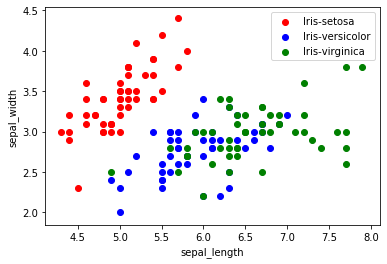

In [6]:
plt.scatter(x[y=='Iris-setosa'].iloc[:,0], x[y=='Iris-setosa'].iloc[:,1], label='Iris-setosa', c='red')
plt.scatter(x[y=='Iris-versicolor'].iloc[:,0], x[y=='Iris-versicolor'].iloc[:,1], label='Iris-versicolor', c='blue')
plt.scatter(x[y=='Iris-virginica'].iloc[:,0], x[y=='Iris-virginica'].iloc[:,1], label='Iris-virginica', c='green')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

plt.show()

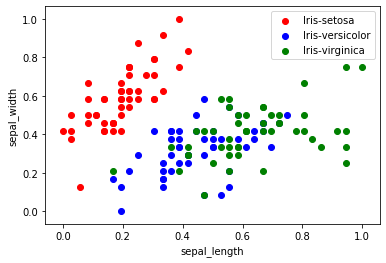

In [8]:
x_norm = (x - x.min())/(x.max() - x.min())

plt.scatter(x_norm[y=='Iris-setosa'].iloc[:,0], x_norm[y=='Iris-setosa'].iloc[:,1], label='Iris-setosa', c='red')
plt.scatter(x_norm[y=='Iris-versicolor'].iloc[:,0], x_norm[y=='Iris-versicolor'].iloc[:,1], label='Iris-versicolor', c='blue')
plt.scatter(x_norm[y=='Iris-virginica'].iloc[:,0], x_norm[y=='Iris-virginica'].iloc[:,1], label='Iris-virginica', c='green')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

plt.show()

In [11]:
pca = sklearnPCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(x_norm))
transformed.head()

,0,1
0,-0.630361,0.111556
1,-0.623546,-0.100313
2,-0.669793,-0.047220
3,-0.654633,-0.098791
4,-0.648263,0.137558


### Dimensionality reduction
PCA - Principal Component Analysis
Looks at mutiple components and filters to principal few

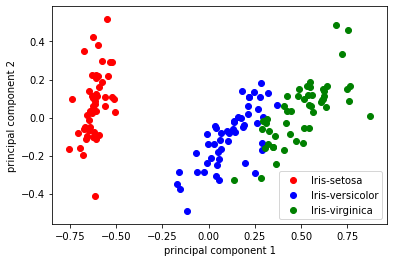

In [12]:
plt.scatter(transformed[y=='Iris-setosa'].iloc[:,0], transformed[y=='Iris-setosa'].iloc[:,1], label='Iris-setosa', c='red')
plt.scatter(transformed[y=='Iris-versicolor'].iloc[:,0], transformed[y=='Iris-versicolor'].iloc[:,1], label='Iris-versicolor', c='blue')
plt.scatter(transformed[y=='Iris-virginica'].iloc[:,0], transformed[y=='Iris-virginica'].iloc[:,1], label='Iris-virginica', c='green')

plt.legend()
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

plt.show()

## Exercise
------

In [15]:
df = pd.read_csv('wine.data.csv')
Label = df['Label']
df = df.drop(columns=['Label'])
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
Label.value_counts()

2    71
1    59
3    48
Name: Label, dtype: int64

In [29]:
attributes = []
for col in df.columns:
    attributes.append(col)
    
round(df[attributes].describe(),2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


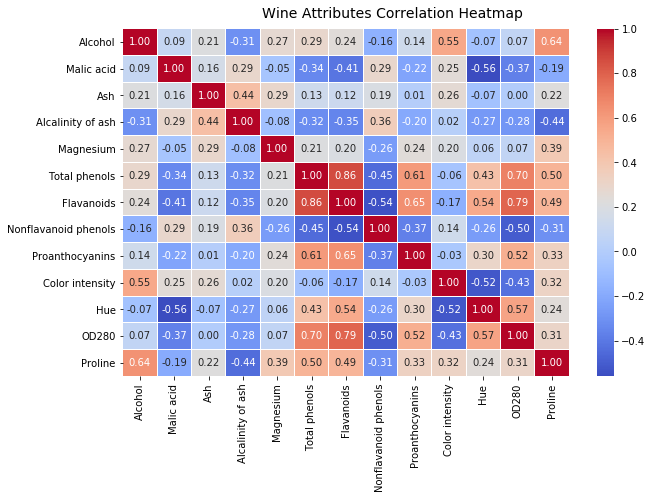

In [31]:
f, ax = plt.subplots(figsize=(10,6))
corr = df.corr()
#pairwise correlation matrix
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f',
                linewidths=.05)
f.subplots_adjust(top=0.93)
t=f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

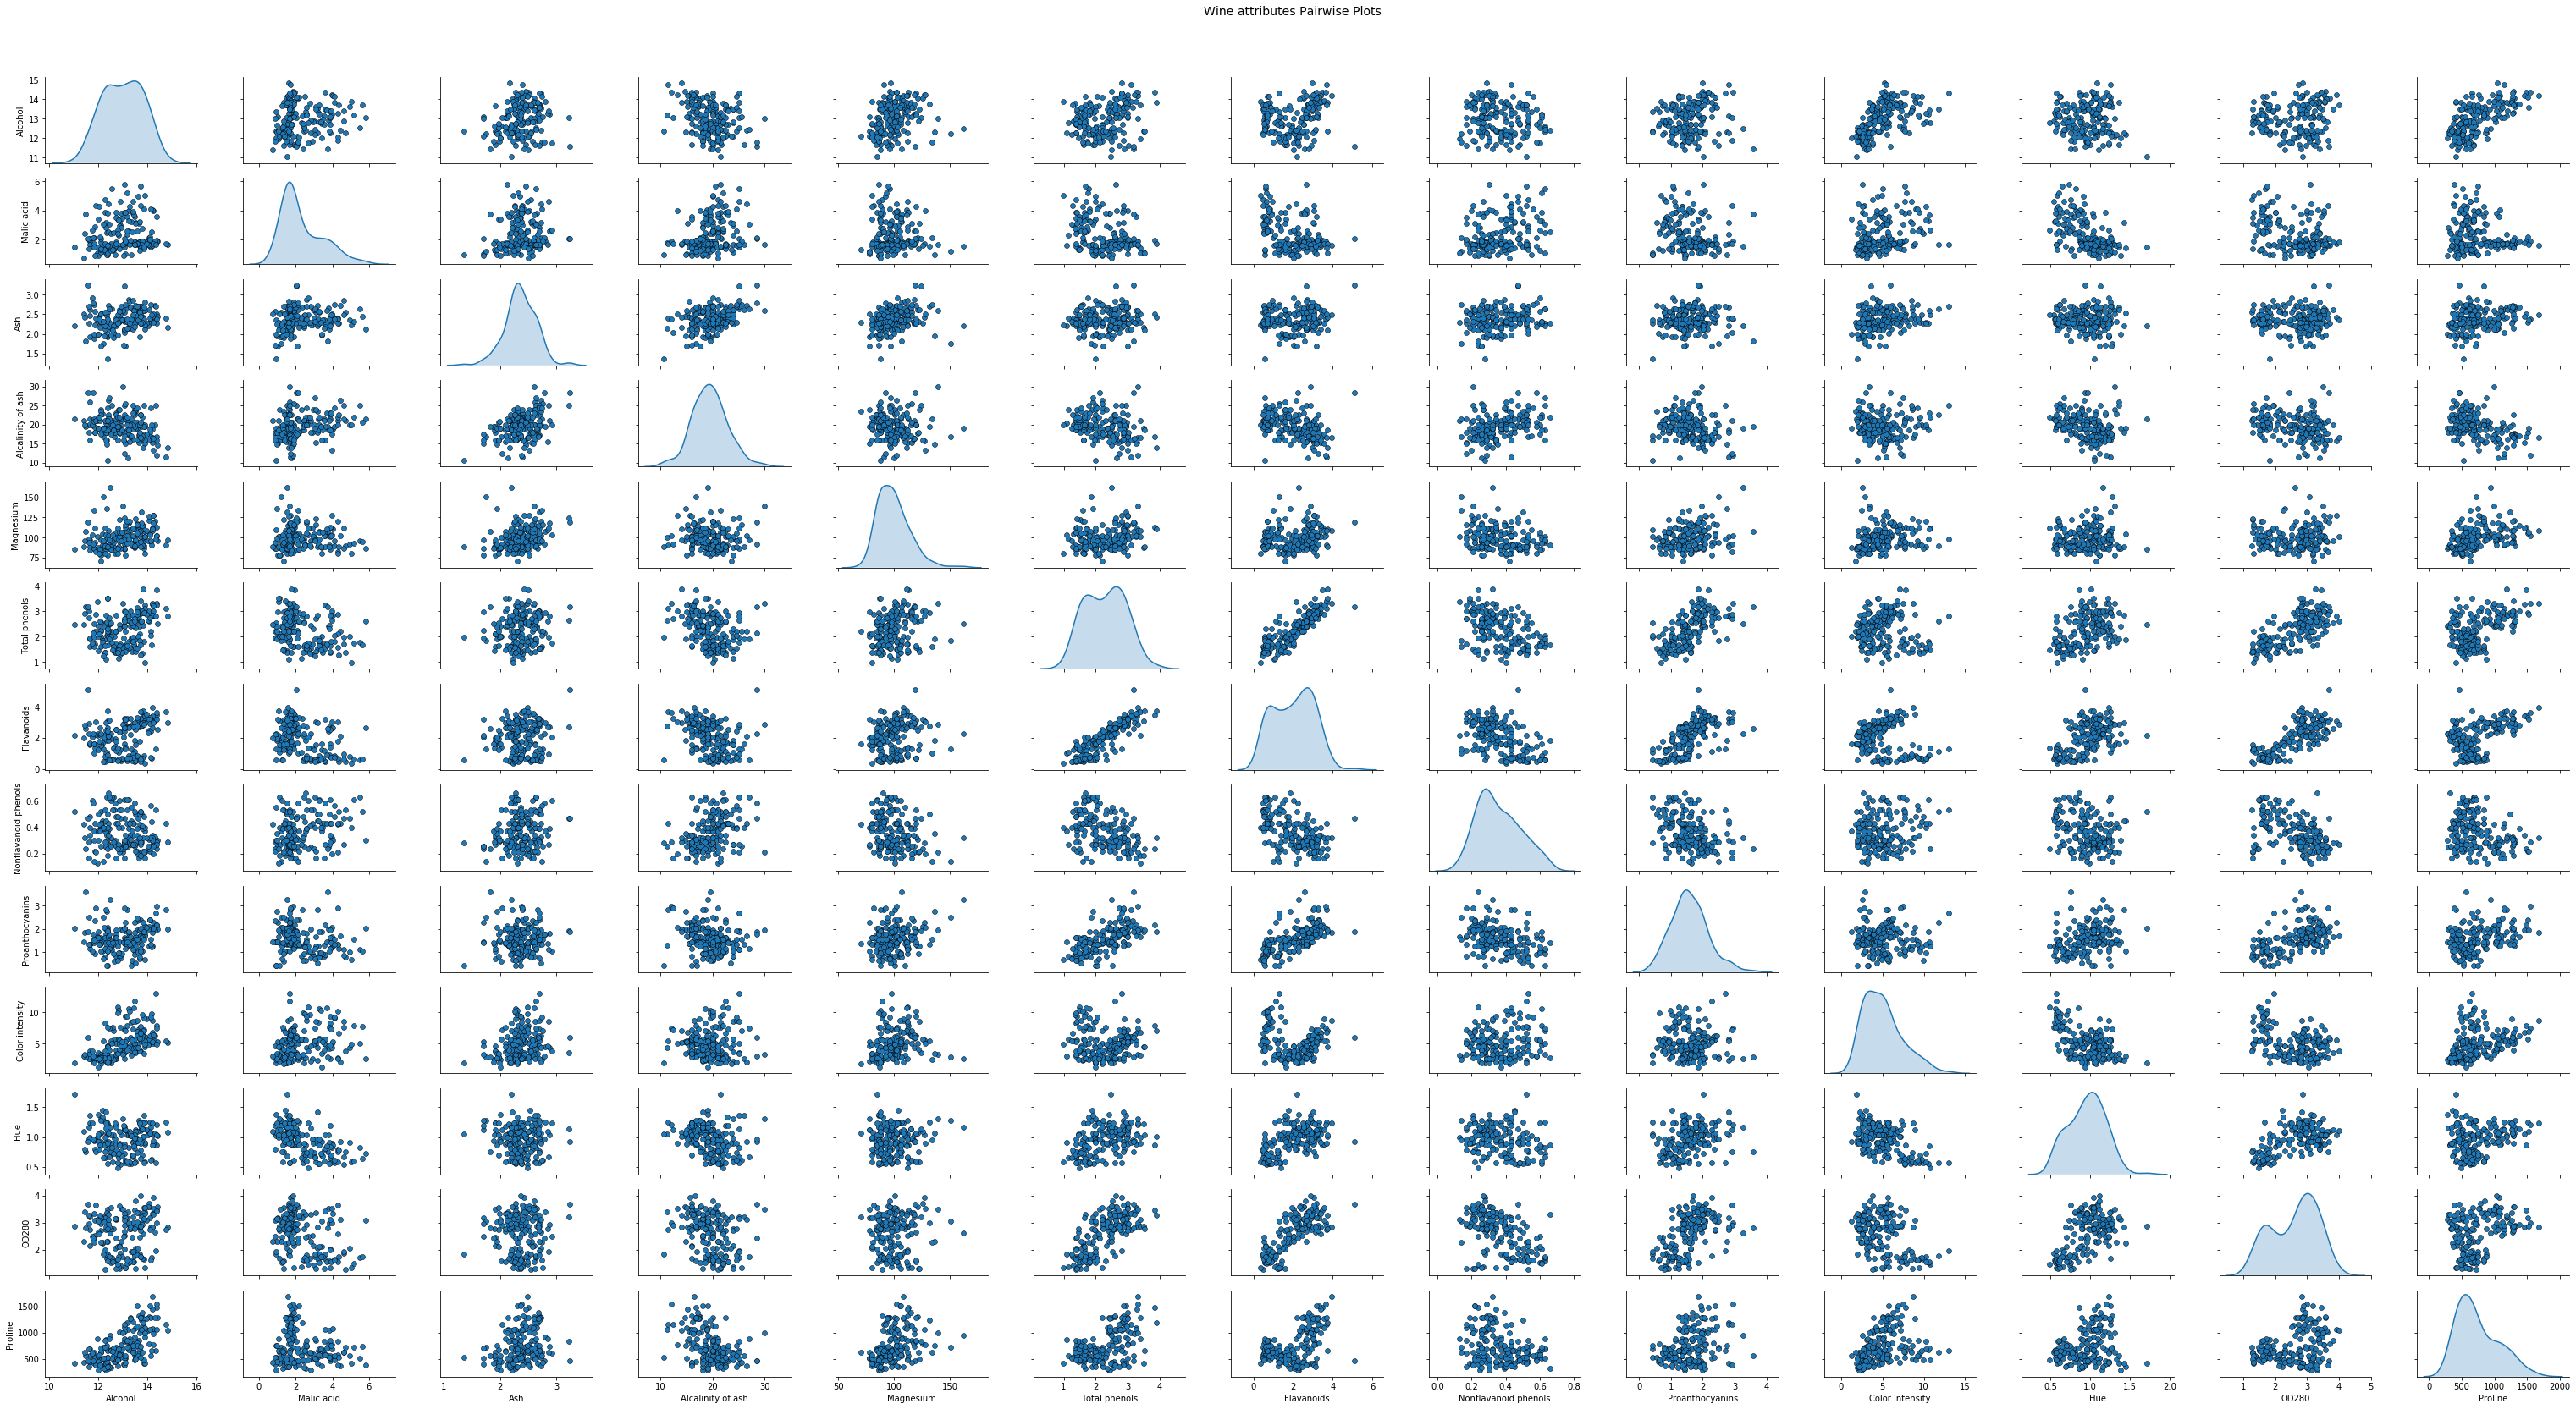

In [34]:
#Pair-wise scatter plot
pp = sns.pairplot(df, height=1.8, aspect=1.8, plot_kws=dict(edgecolor='k', linewidth=0.5),
                 diag_kind='kde', diag_kws=dict(shade=True))
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine attributes Pairwise Plots', fontsize=14)

In [43]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
x_scaled_array = preprocessing.StandardScaler.transform(scaler)
normalizedData = pd.DataFrame(x_scaled_array, columns = df.columns)

TypeError: transform() missing 1 required positional argument: 'X'

In [39]:
scaler.mean_

array([1.30006180e+01, 2.33634831e+00, 2.36651685e+00, 1.94949438e+01,
       9.97415730e+01, 2.29511236e+00, 2.02926966e+00, 3.61853933e-01,
       1.59089888e+00, 5.05808988e+00, 9.57449438e-01, 2.61168539e+00,
       7.46893258e+02])